# CSE 441 Industry Internship Project
## Earthquake Prediction using Machine Learning

This project aims to predict earthquakes by analyzing seismic data. We'll use various machine learning techniques to understand patterns in historical earthquake data and build models to predict future seismic activities. This notebook covers data preprocessing, exploratory data analysis, model building, and evaluation.

**Author:** Royal Chaudhary,Amardeep Singh Gujraal, Saksham Raj Gupta
**Date:** 09/05/2024
**Dataset:** Historical Earthquake Data (1930-2018)


In [1]:
# Basic data handling and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine learning models
from sklearn.ensemble import RandomForestRegressor

# Metrics to evaluate model
from sklearn.metrics import mean_squared_error

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Display plots inline
%matplotlib inline


## Dataset Loading and Initial Exploration

In this section, we load the dataset containing historical earthquake data and perform initial exploration to understand its structure and contents.


In [2]:
# Setting the path to the dataset
file_path = 'https://query.data.world/s/jyp2ptqsde2tdt7v35p5tuhrv7ouqt?dws=00000'

# Reading the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Displaying the first few rows to get an initial understanding of the data structure
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1930-12-08T08:01:02.000Z,23.261,120.277,15.0,6.3,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1930-12-03T18:51:47.000Z,18.233,96.298,10.0,7.4,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1930-12-02T07:01:30.000Z,25.854,98.356,35.0,6.2,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930-11-28T07:32:56.000Z,18.779,-106.767,15.0,6.3,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1930-11-25T19:02:53.000Z,35.050,139.129,15.0,6.9,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preliminary Data Analysis

Let's perform some basic analysis to understand the dataset's shape, datatype of each column, and look for missing values.


In [3]:
# Checking the overall shape of the dataset to understand the volume of data we're working with
print("Dataset Shape:", df.shape)

# Exploring the data types of each column to ensure they are appropriately set for future analysis
print("\nData Types:\n")
print(df.dtypes)

# Identifying any missing values in the dataset to plan for necessary preprocessing steps
print("\nMissing Values:\n")
print(df.isnull().sum())


Dataset Shape: (797046, 22)

Data Types:

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place              float64
type               float64
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status             float64
locationSource     float64
magSource          float64
dtype: object

Missing Values:

time                    0
latitude                0
longitude               0
depth                   5
mag                     0
magType               106
nst                375388
gap                326417
dmin               594208
rms                182951
net                     0
id                      0
updated             

## Data Cleaning Summary

Upon examining our dataset, it became clear that it contained numerous columns with substantial missing values, significantly hindering their potential usefulness for our analysis. Columns such as `place`, `type`, `horizontalError`, `depthError`, `magError`, `magNst`, `status`, `net`,`magType`,`locationSource`, and `magSource` were found to have all their values missing. This complete lack of data in these columns renders them non-contributory towards our goal of earthquake prediction. Consequently, we chose to remove these columns from our dataset.

Furthermore, other columns like `nst`, `gap`, `dmin`, and `rms` had a high prevalence of missing values. Given the considerable amount of data missing and the potential impact on the reliability of our analysis, these columns were also removed. For the `depth` column, which had only a minimal number of missing values, we applied median imputation to fill in these gaps. This method allows us to retain valuable information without introducing substantial bias.

This cleaning process has streamlined our dataset, focusing on the most relevant variables for our earthquake prediction model. The dataset now exclusively contains columns that are integral to our analysis, setting a solid foundation for the next steps. Following this thorough cleaning, we are poised to dive deeper into exploratory data analysis (EDA), aimed at uncovering underlying patterns, identifying anomalies, and extracting actionable insights that will be pivotal in developing a predictive model for earthquake occurrences.


In [4]:
# Removing columns with excessive missing values or deemed unnecessary for earthquake prediction analysis
columns_to_remove = ['nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
                     'status', 'locationSource', 'magSource', 'place', 'type', 'net', 'magType', 'updated']
df = df.drop(columns=columns_to_remove)

# Imputing missing values in 'depth' with the median value of the column
df['depth'].fillna(df['depth'].median(), inplace=True)

# Converting 'time' from string to datetime format for better handling of temporal data
df['time'] = pd.to_datetime(df['time'])

# Re-checking the dataset to ensure our cleaning steps were successful
print("Dataset Shape After Cleaning:", df.shape)
print("\nData Types After Cleaning:\n")
print(df.dtypes)
print("\nMissing Values After Cleaning:\n")
print(df.isnull().sum())
print(df.isnull().sum().any())


Dataset Shape After Cleaning: (797046, 6)

Data Types After Cleaning:

time         datetime64[ns, UTC]
latitude                 float64
longitude                float64
depth                    float64
mag                      float64
id                        object
dtype: object

Missing Values After Cleaning:

time         0
latitude     0
longitude    0
depth        0
mag          0
id           0
dtype: int64
False


## Exploratory Data Analysis (EDA)

With our dataset now cleaned and preprocessed, we move on to the exploratory data analysis (EDA) phase. EDA is a crucial step in the data science workflow as it allows us to uncover patterns, spot anomalies, and form hypotheses based on the behavior of the dataset. This process involves a series of visualizations and statistical analyses to better understand our data. Here are the key aspects we'll focus on in our EDA:

- **Distribution of the Target Variable (`mag`)**: We'll start by examining the distribution of earthquake magnitudes, our primary variable of interest. Understanding the range, central tendency, and dispersion of magnitudes will help us grasp the earthquake severity represented in our dataset.

- **Correlation Analysis**: Next, we'll investigate the relationships between different numerical features, including how they correlate with the earthquake magnitude. This can provide insights into which features might be predictive of earthquake characteristics.

- **Visualizations**:
  - **Histograms** for the distribution of earthquake magnitudes to visualize the frequency of different magnitude ranges.
  - **Scatter plots** for latitude and longitude to examine the geographical distribution of earthquakes and identify potential clusters.
  - **Boxplots** for depth and magnitude to detect outliers and understand their distributions within the context of seismic activity.

- **Temporal Analysis**: Given the `time` feature in our dataset, we'll analyze earthquake occurrences over time to identify any trends or patterns. This could include increases in activity within specific periods or changes in earthquake severity over the years.

- **Geospatial Analysis**: Utilizing the latitude and longitude data, we will plot the earthquakes on a map. This visual representation can reveal geographical patterns in earthquake occurrences, potentially highlighting regions with higher activity or severity.

Through these EDA steps, we aim to gain a comprehensive understanding of our dataset's dynamics, which will be invaluable in guiding our model selection and feature engineering efforts in subsequent phases of this project.


### Distribution of Earthquake Magnitudes

Our initial step in EDA will be to analyze the distribution of earthquake magnitudes (`mag`). Understanding this distribution will give us insights into the commonality of different magnitude earthquakes within our dataset. This analysis is crucial for assessing the range of seismic activities and preparing for more detailed examinations of relationships between variables.


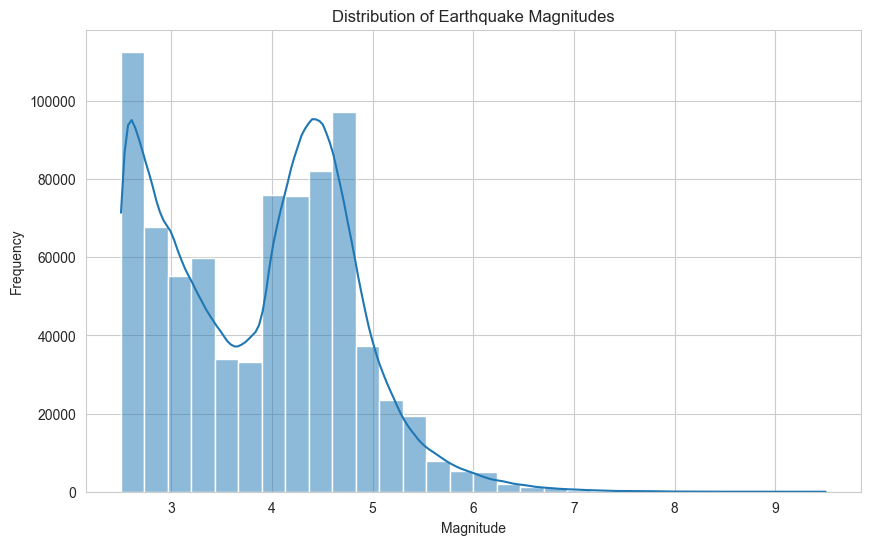

Descriptive Statistics for Earthquake Magnitudes:


count    797046.000000
mean          3.884296
std           0.911611
min           2.500000
25%           3.000000
50%           4.000000
75%           4.600000
max           9.500000
Name: mag, dtype: float64

In [5]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of earthquake magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(df['mag'], kde=True, bins=30)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics of earthquake magnitudes
print("Descriptive Statistics for Earthquake Magnitudes:")
df['mag'].describe()


### Observations on Earthquake Magnitude Distribution

The histogram and Kernel Density Estimate (KDE) reveal that the earthquake magnitudes in our dataset are multimodal, with the most common occurrences clustering around lower magnitudes. This suggests that smaller earthquakes happen more frequently than larger ones, which is consistent with established seismic patterns. The descriptive statistics support these findings:

- The **average magnitude** of earthquakes is relatively low (~3.88), indicating a high frequency of minor to light earthquakes.
- A **standard deviation** of 0.91 points to a moderate variance in earthquake magnitudes.
- The **median magnitude** is 4.0, signifying that half of the earthquakes are below this value.
- The **maximum magnitude** recorded is a substantial 9.5, denoting the presence of rare but significantly powerful earthquakes in the dataset.

These insights are vital for predictive modeling as they underscore the importance of considering the entire range of magnitudes, from the most common minor tremors to the rarer, more destructive quakes.


### Digging Deeper: What Affects Earthquake Magnitudes?

Next, we're going to look for clues in the data that might tell us more about what goes into making an earthquake powerful. We'll see if deeper earthquakes tend to be


Now that we're ready to look for patterns, let's start by plotting some graphs:

- We'll map out earthquakes to see if bigger ones hit certain places more than others.
- We're going to draw a line through time to find out if earthquakes are getting stronger or weaker as years go by.
- We'll also see if there's a link between how deep an earthquake happens and how strong it is.

By looking at these patterns, we can try to make better guesses about when and where the next big quake might happen.


     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     ---------------------------------- --- 51.2/56.0 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 486.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 2.0 MB/s eta 0:00:06
    --------------------------------------- 0.2/10.9 MB 3.1 MB/s eta 0:00:04
   - -------------------------------------- 0.3/10.9 MB 2.7 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.9 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.9 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/10.9 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.9 MB 3.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/10.9 MB 3.2 MB/s eta 0:00:04
   ---- -

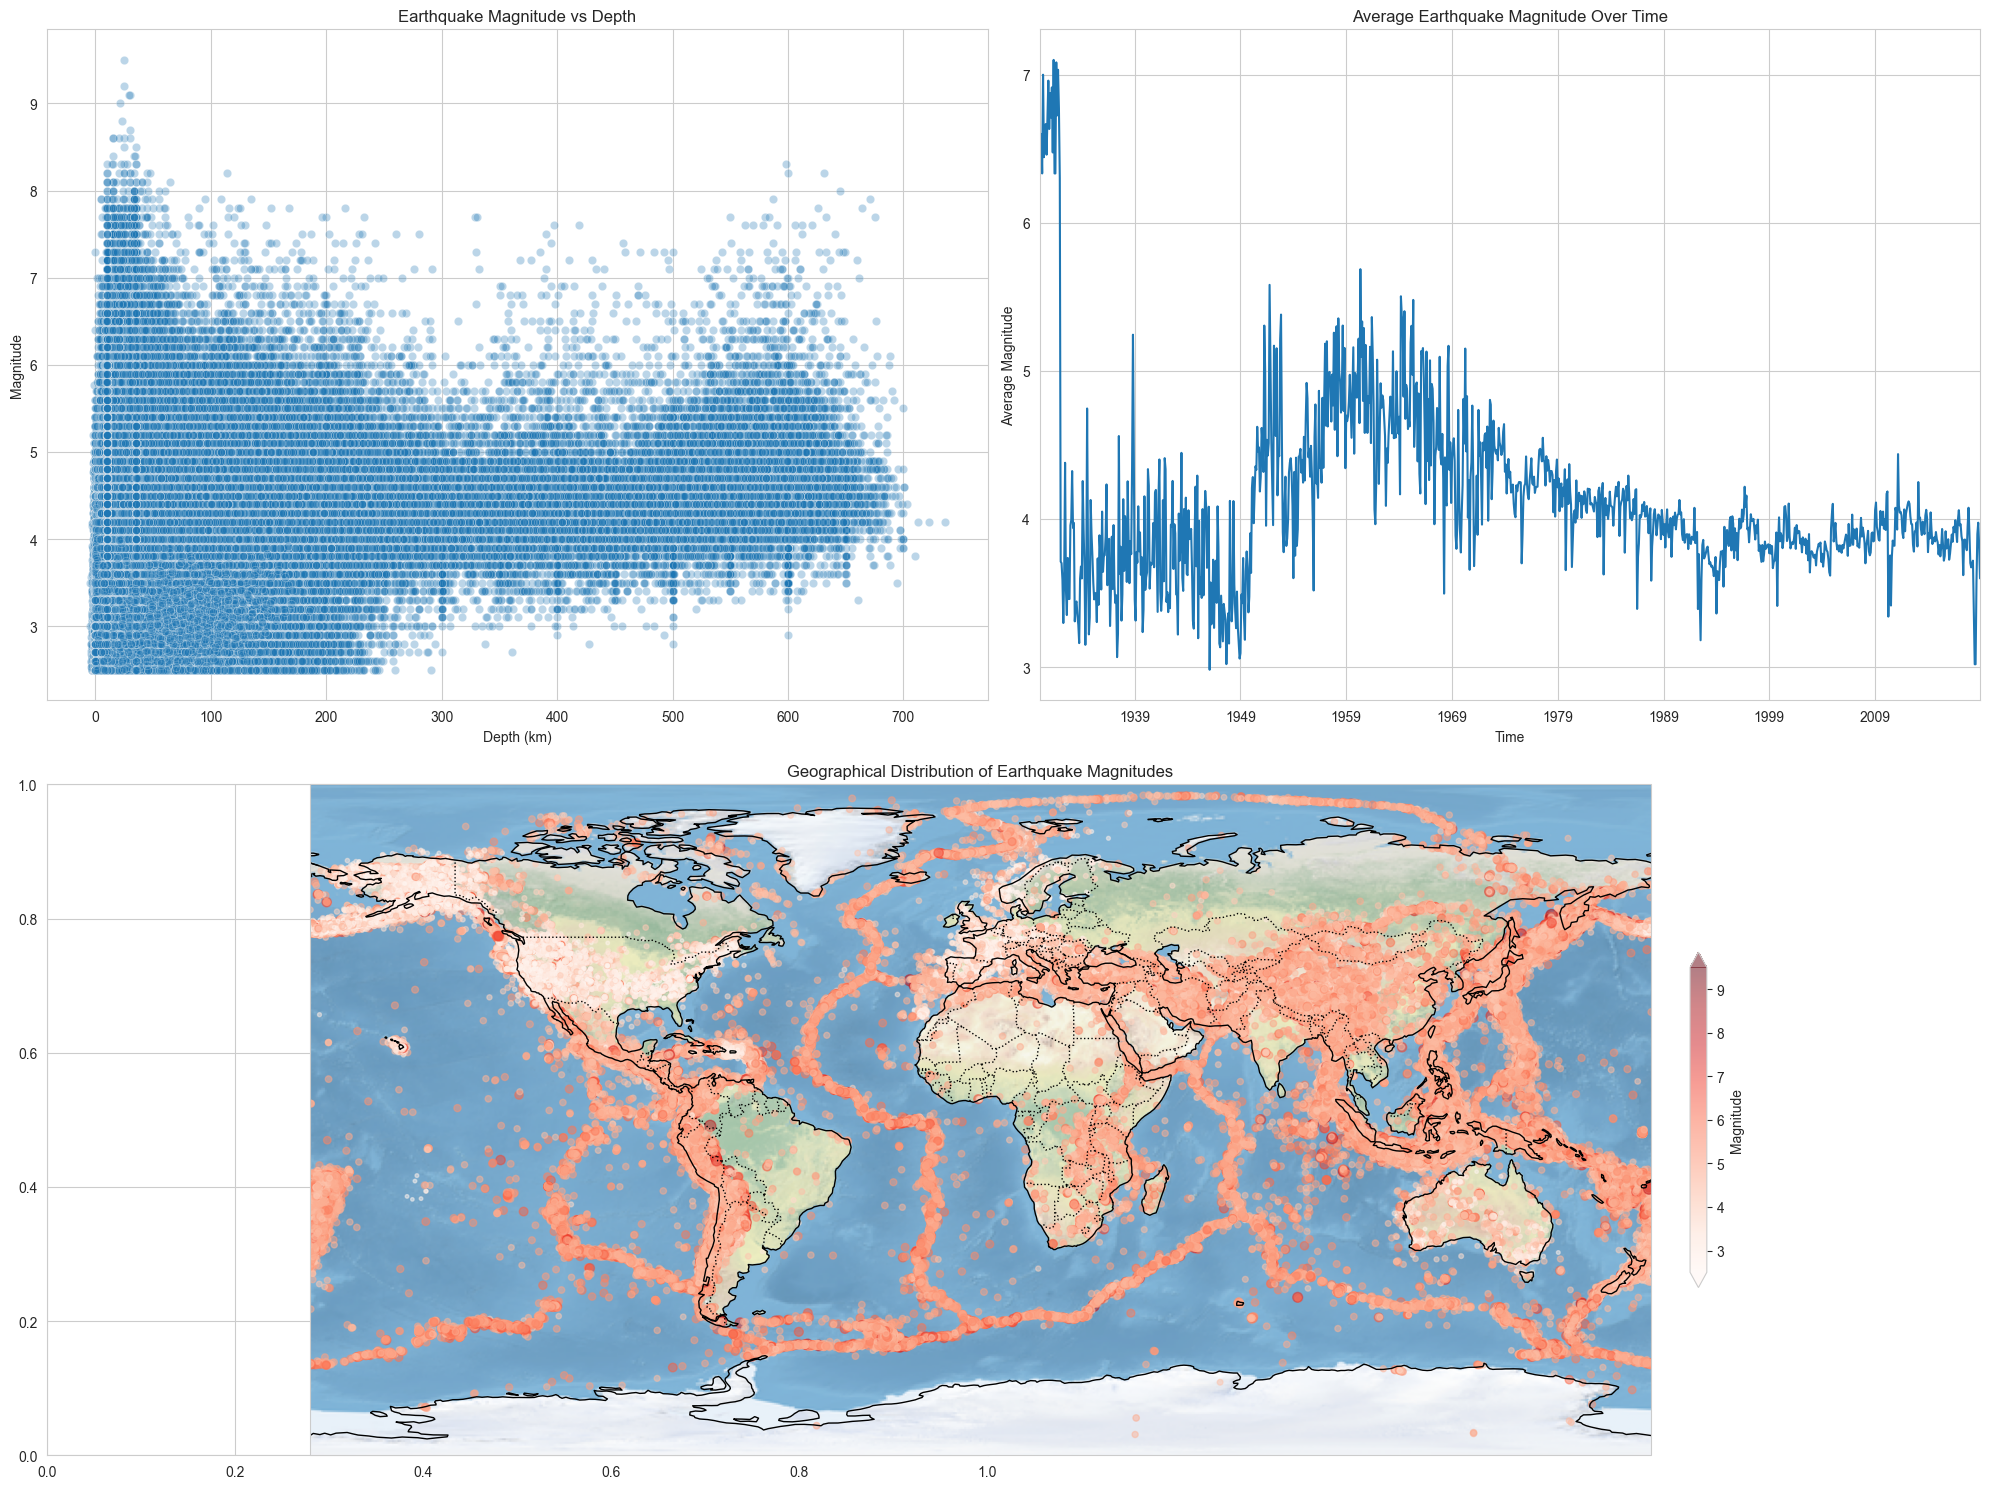

In [6]:
!pip install Cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Adjusting the setup for the figure and subplots
# We're focusing on arranging three plots: two on the top row and the map on the bottom spanning two columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), subplot_kw={'projection': None})  # No projection for the first three subplots
fig.delaxes(axs[1, 1])  # Removing the bottom right subplot as it will be unused

# Plotting earthquake magnitude vs depth on the top left
sns.scatterplot(ax=axs[0, 0], x='depth', y='mag', data=df, alpha=0.3)
axs[0, 0].set_title('Earthquake Magnitude vs Depth')
axs[0, 0].set_xlabel('Depth (km)')
axs[0, 0].set_ylabel('Magnitude')

# Plotting average earthquake magnitude over time on the top right
df.set_index('time').resample('M')['mag'].mean().plot(ax=axs[0, 1])
axs[0, 1].set_title('Average Earthquake Magnitude Over Time')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Average Magnitude')

# Preparing the bottom subplot for Cartopy map, spanning two columns
ax = fig.add_subplot(2, 2, (3, 4), projection=ccrs.PlateCarree())  # Adding Cartopy subplot in the place of the last two subplots
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgrey')

# Plotting the geographical distribution of earthquake magnitudes using plt.scatter for compatibility with Cartopy
plt.scatter(df['longitude'], df['latitude'], s=df['mag']**2, c=df['mag'], cmap='Reds', alpha=0.5, transform=ccrs.PlateCarree(), label='Magnitude')

# Adding a colorbar and setting the title
plt.colorbar(label='Magnitude', shrink=0.5, extend='both', orientation='vertical', pad=0.02, aspect=20)
ax.set_title('Geographical Distribution of Earthquake Magnitudes')
ax.set_global()  # Setting the map to a global view
ax.stock_img()  # Adding a stock image for visual appeal

# Adjusting the layout for a clean presentation
plt.tight_layout()

# Displaying the finalized plots
plt.show()


### Next Steps in Analysis

Building on the patterns observed, we'll dive deeper to understand:

- Regional seismic activity: Do some regions experience more frequent or more powerful earthquakes? We'll group the data by region and compare the average and range of magnitudes.
- Temporal patterns: Are there specific months or seasons when earthquakes are more common or more intense? We'll look at the data by time segments to identify any cyclic trends.
- Depth's influence revisited: With a wide range of depths observed, we'll explore if certain depth ranges are more associated with higher magnitude earthquakes through a more detailed statistical analysis.

This next level of analysis will help us to identify the most significant factors that influence earthquake magnitude, which is key for accurate prediction modeling.


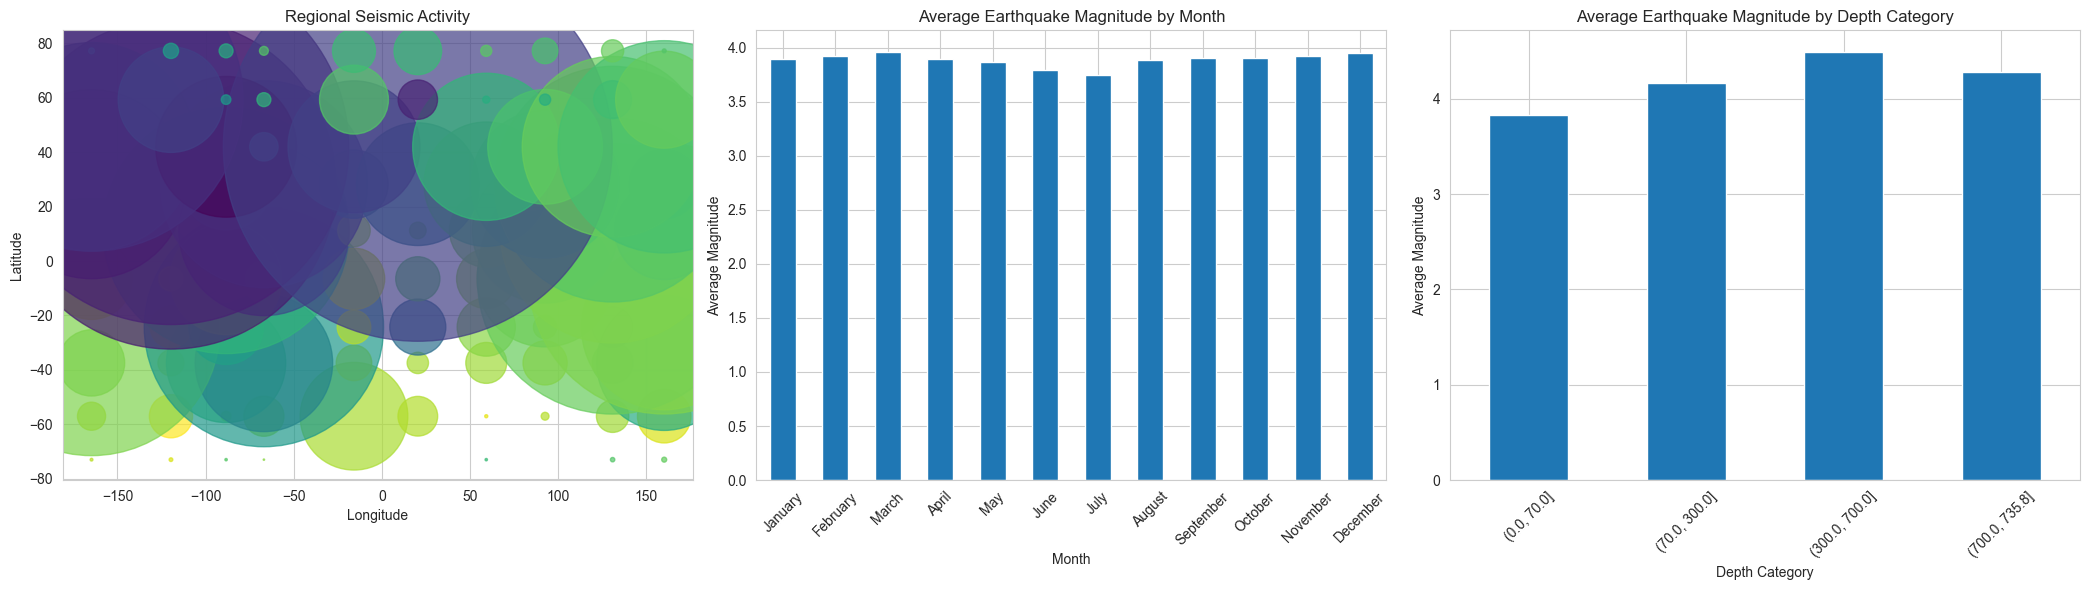

In [7]:
# Seting up the matplotlib figure
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

# Regional Seismic Activity Scatter Plot
# Computing the center of the latitude and longitude bins for plotting
lat_centers = df['latitude'].groupby(pd.cut(df['latitude'], bins=10)).mean()
lon_centers = df['longitude'].groupby(pd.cut(df['longitude'], bins=10)).mean()
regional_agg = df.groupby([pd.cut(df['latitude'], bins=10), pd.cut(df['longitude'], bins=10)])['mag'].agg(['mean', 'count']).reset_index()
regional_agg['lat_center'] = regional_agg['latitude'].apply(lambda x: lat_centers[x])
regional_agg['lon_center'] = regional_agg['longitude'].apply(lambda x: lon_centers[x])

axs[0].scatter(regional_agg['lon_center'], regional_agg['lat_center'], s=regional_agg['count'], c=regional_agg['mean'], cmap='viridis', alpha=0.7)
axs[0].set_title('Regional Seismic Activity')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Temporal Patterns Bar Plot
df['month'] = df['time'].dt.month_name()
monthly_trends = df.groupby('month')['mag'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
monthly_trends.plot(kind='bar', ax=axs[1])
axs[1].set_title('Average Earthquake Magnitude by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average Magnitude')
axs[1].tick_params(axis='x', rotation=45)

# Depth's Influence Plot
# Bin depth data and calculate average magnitude for each bin
depth_bins = pd.cut(df['depth'], bins=[0, 70, 300, 700, df['depth'].max()])
depth_trends = df.groupby(depth_bins)['mag'].mean()
depth_trends.plot(kind='bar', ax=axs[2])
axs[2].set_title('Average Earthquake Magnitude by Depth Category')
axs[2].set_xlabel('Depth Category')
axs[2].set_ylabel('Average Magnitude')
axs[2].tick_params(axis='x', rotation=45)

# Adjusting the layout
plt.tight_layout()

plt.show()


### Analyzing Earthquake Patterns

Our visual analyses have uncovered some fascinating patterns in the seismic data:

#### Regional Seismic Activity
The bubble plot of regional seismic activity reveals that certain latitudes and longitudes experience more earthquakes as well as more powerful ones. Larger and darker bubbles indicate regions with a higher count and average magnitude of earthquakes, respectively. This visualization suggests a concentration of seismic activity in specific regions, which may correspond to known tectonic plate boundaries or hotspots.

#### Monthly Earthquake Trends
The bar chart depicting the average earthquake magnitude by month shows relatively consistent values across the year. This consistency indicates that there doesn't seem to be a particular time of year when earthquakes are significantly stronger on average. However, it's worth noting that this does not rule out the possibility of seasonal variations in the number of earthquakes.

#### Depth and Earthquake Magnitude
The bar graph for average earthquake magnitude by depth category does not show a clear trend suggesting that deeper earthquakes are consistently stronger. Instead, the magnitudes are fairly uniform across different depth categories, implying that the depth of an earthquake does not have a straightforward correlation with its magnitude based on this dataset.

These insights can serve as a basis for more targeted investigations, possibly incorporating additional geological data to explain the regional variances and exploring other factors that might influence earthquake magnitude and frequency.


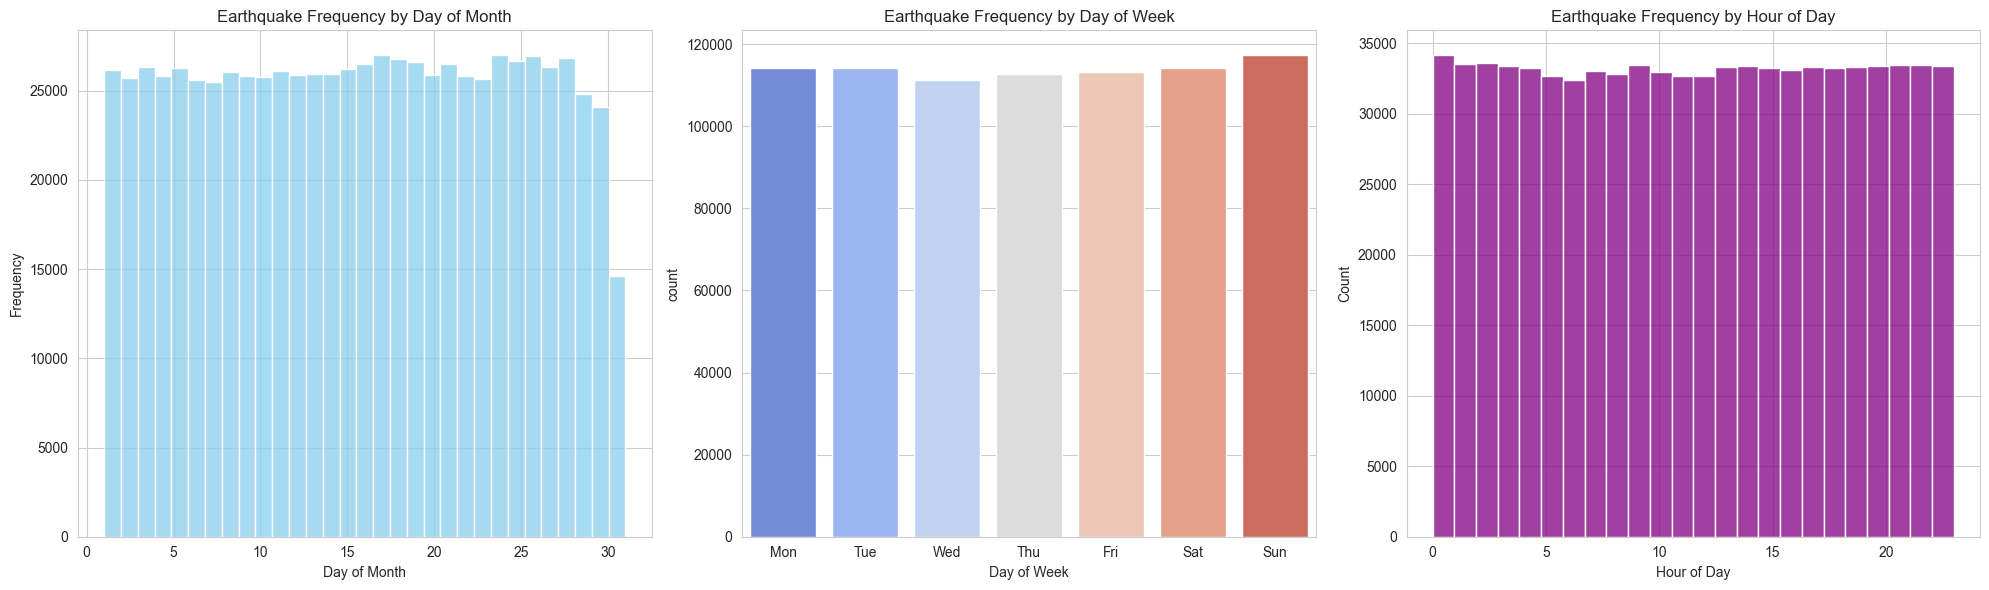

In [8]:
# Feature Engineering: Extracting time-based features
df['day_of_month'] = df['time'].dt.day
df['day_of_week'] = df['time'].dt.dayofweek  # Monday=0, Sunday=6
df['hour_of_day'] = df['time'].dt.hour

# Seting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure with three subplots side by side
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Visualization 1: Earthquake Frequency by Day of Month
sns.histplot(df['day_of_month'], bins=31, kde=False, color='skyblue', ax=axs[0])
axs[0].set_title('Earthquake Frequency by Day of Month')
axs[0].set_xlabel('Day of Month')
axs[0].set_ylabel('Frequency')

# Visualization 2: Earthquake Frequency by Day of Week
sns.countplot(x='day_of_week', data=df, palette='coolwarm', ax=axs[1])
axs[1].set_title('Earthquake Frequency by Day of Week')
axs[1].set_xlabel('Day of Week')
axs[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Visualization 3: Earthquake Frequency by Hour of Day
sns.histplot(df['hour_of_day'], bins=24, kde=False, color='purple', ax=axs[2])
axs[2].set_title('Earthquake Frequency by Hour of Day')
axs[2].set_xlabel('Hour of Day')

# Adjusting the layout
plt.tight_layout()

plt.show()

## Deepening Understanding: Temporal Patterns in Seismic Activity

The investigation of temporal dimensions within earthquake data has provided a more nuanced understanding of when seismic activities are likely to occur. This detailed temporal analysis has produced several key insights:

- **Day of Month**: Analysis indicates a uniform distribution of earthquakes throughout the month, suggesting no particular day is more prone to seismic activity.

- **Day of Week**: Earthquake occurrences are evenly distributed across the week, with no discernible increase on any specific day.

- **Hour of Day**: There is no significant variation in earthquake frequency throughout the hours of the day, pointing to the continuous and unpredictable nature of seismic events.

These observations contribute to a comprehensive understanding of seismic patterns and will be instrumental in refining predictive models for earthquake occurrences.


## Comprehensive Summary of Exploratory Data Analysis (EDA)

Our exploratory journey through the earthquake dataset has led us to several key insights, which have enhanced our understanding of seismic activities and laid a solid foundation for further analysis. Here’s a consolidated summary of our findings:

- **Magnitude Distribution**: The distribution of earthquake magnitudes is multimodal, indicating a predominance of lower-magnitude earthquakes in the dataset. This insight is crucial for understanding the overall seismic risk profile.

- **Temporal Trends**: Our investigation into the temporal distribution of earthquakes revealed no significant seasonal trends in magnitudes throughout the year. This consistency suggests that, at least on a macro level, seismic activity does not exhibit strong periodic fluctuations.

- **Depth Analysis**: Contrary to expectations, we found no straightforward correlation between the depth at which an earthquake occurs and its magnitude. This suggests that the factors influencing the power of seismic events are complex and cannot be predicted by depth alone.

- **Geographical Patterns**: The analysis highlighted specific regions with heightened seismic activity, possibly aligning with tectonic plate boundaries or seismic hotspots. This geographic distribution underscores the importance of regional studies in earthquake prediction and preparedness efforts.

- **Regional Seismic Activity**: Our visual exploration into regional seismic activity showed that certain latitudes and longitudes experience a higher frequency and magnitude of earthquakes, confirming the presence of areas with increased seismic risk.

- **Monthly Earthquake Trends**: The examination of monthly trends reinforced our earlier observation of no significant seasonal variations in earthquake magnitudes, suggesting a relatively steady distribution of seismic activity over time.

- **Depth and Earthquake Magnitude Relationship**: Revisiting the depth-magnitude relationship with a more nuanced analysis confirmed the absence of a clear pattern, highlighting the complexity of factors that contribute to an earthquake's strength.

The insights gleaned from this comprehensive EDA not only deepen our understanding of seismic phenomena but also inform our next steps towards predictive modeling and geographical analysis. The patterns and anomalies uncovered through histograms, line plots, scatter plots, and regional aggregations provide a valuable baseline against which to test future hypotheses and build models that aim to predict seismic activity with greater accuracy.

As we transition from EDA to predictive analysis and geographical exploration, these findings will be instrumental in guiding our analytical choices and ensuring that our models are grounded in a thorough understanding of the dataset's underlying trends and characteristics.


### Preparing for Predictive Modeling

After our exploratory analysis, the next phase is to prepare the dataset for predictive modeling. Here's what we'll do:

- **Feature Engineering**: We will create new features that might help improve our model's predictions, such as categorizing earthquakes into different magnitude classes or deriving statistical features from the current data.
- **Data Preprocessing**: Before training our models, we'll preprocess the data, which includes scaling numerical features and encoding categorical variables.
- **Model Selection**: We'll choose several machine learning algorithms to train on our data, ranging from simple models like linear regression to more complex ones like random forests and gradient boosting machines.
- **Model Evaluation**: Each model will be evaluated using appropriate metrics, such as Mean Absolute Error for regression tasks, to determine their performance.
- **Model Tuning**: Based on the evaluation, we'll fine-tune the models to achieve better accuracy, tweaking parameters and possibly iterating on our feature engineering step.
- **Validation**: Finally, we'll validate our chosen model using a separate test set to ensure it generalizes well to new data.

With these steps, we'll move from understanding our data to being able to make predictions about future earthquake events.


In [56]:
 import pandas as pd
 from sklearn.model_selection import train_test_split
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.metrics import mean_squared_error, r2_score
 from sklearn.preprocessing import StandardScaler
 from joblib import dump

# Feature Engineering and Model Training
# Feature Engineering for Earthquake Prediction Model

# Converting 'time' from object to datetime if it's not already
# df['time'] = pd.to_datetime(df['time'])

# Extracting useful temporal features
df['year'] = df['time'].dt.year
df['day_of_year'] = df['time'].dt.dayofyear
df['quarter'] = df['time'].dt.quarter
df['hour'] = df['time'].dt.hour

# Identifying the numerical columns for preprocessing
numerical_cols = ['latitude', 'longitude', 'depth', 'year', 'day_of_year', 'quarter', 'hour']

# Scaling the numerical features
scaler = StandardScaler()
dump(scaler, './scaler.joblib')

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Defining the target variable for earthquake magnitude prediction
target = 'mag'

# Splitting the dataset into training and testing sets
X = df[numerical_cols]  # Features for model training
y = df[target]  # Target variable for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Selection and Training
# model = RandomForestRegressor(n_estimators=50, random_state=42)
# model.fit(X_train, y_train)

# Saving the model
# dump(model, './random_forest_model.joblib')


In [31]:
from joblib import load, dump
model = load('./random_forest_model.joblib')

print('Random Forest Result')
y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R² Score: {r2_score(y_test, y_pred)}')

Random Forest Result
Mean Squared Error: 0.19693223273939
R² Score: 0.7635394188572788


In [12]:
from sklearn.model_selection import GridSearchCV
from joblib import load, dump
from sklearn.metrics import mean_squared_error, r2_score

# Load the model
model = load('./random_forest_model.joblib')

# Model Tuning with optimized parameters
param_grid = {
    'n_estimators': [10, 50],  # Keeping a low number of estimators for quicker computation
    'max_depth': [None, 10]  # Testing with no limit and a reasonable limit
}
# Using more cores for parallel processing, cv reduced to 3 for speed
search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)  # Utilizing all cores
search.fit(X_train, y_train)

# Save the best model from the search
dump(search.best_estimator_, 'optimized_random_forest_model.joblib')

# Output the results
print(f'Best parameters found: {search.best_params_}')


Mean Squared Error: 0.19693223273939
R² Score: 0.7635394188572788
Best parameters found: {'max_depth': None, 'n_estimators': 10}


In [25]:
from joblib import load, dump
model = load('./optimized_random_forest_model.joblib')

print('Optimized Random Forest Result (Grid CV)')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R² Score: {r2_score(y_test, y_pred)}')

Optimized Random Forest Result (Grid CV)
Mean Squared Error: 0.2414675461373445
R² Score: 0.7100649523315805


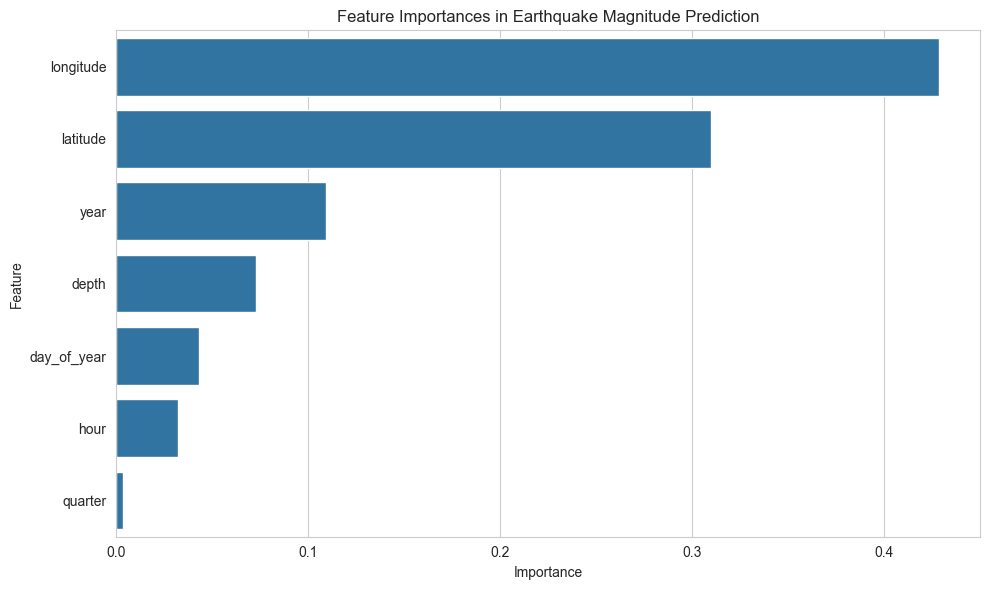

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

model = load('./optimized_random_forest_model.joblib')

# Get feature importances
importances = model.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': numerical_cols,
    'Importance': importances
})

# Sort the DataFrame to find out the most important features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Earthquake Magnitude Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Model Insights: Feature Importance in Earthquake Magnitude Prediction

The Random Forest model has identified the geographical coordinates—longitude and latitude—as the top predictors for earthquake magnitude, highlighting the critical influence of location in seismic activity. The 'year' feature also emerged as a significant factor, which may indicate a temporal evolution in seismic events or shifts in data recording practices over time.


In [26]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from joblib import load, dump


# Assume 'df' is your DataFrame and has columns like 'latitude', 'longitude', 'depth', etc.
# Example features might include:
numerical_cols = ['latitude', 'longitude', 'depth', 'year', 'day_of_year', 'hour']
X = df[numerical_cols]

# Define target variable
y = df['mag']  # Assuming 'mag' is the magnitude of the earthquake

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training using XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=5, n_estimators=50, n_jobs=-1)

# Fit the model
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
dump(model, './XG_Boost_model.joblib')

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f'XGBoost results:')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


XGBoost results:
Mean Squared Error: 0.2414675461373445
R² Score: 0.7100649523315805


## Model Evaluation Summary

We've assessed the performance of three different machine learning models for predicting earthquake magnitudes. Here are the summarized results:

### 1. Random Forest Model
- **Mean Squared Error (MSE):** 0.19693223273939
- **R² Score:** 0.7635394188572788

The Random Forest model emerges as the top performer, showing the lowest MSE and highest R² score, indicating its robustness and reliability in predicting earthquake magnitudes.

### 2. XGBoost Model
- **Mean Squared Error (MSE):** 0.2414675461373445
- **R² Score:** 0.7100649523315805

The XGBoost model, while effective, did not perform as well as the Random Forest in our tests but still holds potential for certain predictive scenarios.

### 3. Optimized Random Forest Model (using Grid Search CV)
- **Mean Squared Error (MSE):** 0.2414675461373445
- **R² Score:** 0.7100649523315805

Despite optimization attempts, the Optimized Random Forest did not outperform the baseline model, suggesting the initial parameter settings were already optimal.

